Importing Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Loading Dataset

In [119]:
df = pd.read_csv("Sample - Superstore.csv")

Viewing Dataset

In [120]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Understanding Dataset and Preparing Data

In [121]:
df.shape

(9994, 21)

In [122]:
# Removing Duplicates if any
df.drop_duplicates(inplace=True)
df.shape

(9994, 21)

In [123]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [124]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [126]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [128]:
print("\nDifferent Ship Modes available in Dataset: ", df['Ship Mode'].unique())
print("\nDifferent Category present in Dataset: ", df['Category'].unique())
print("\nDifferent Segments present in the Dataset: ", df['Segment'].unique())
print("\nDifferent Sub-Category present in the Dataset: ", df['Sub-Category'].unique())
print("\nNumber of States that are present in the dataset: ", df['State'].nunique())
print("\nNumber of Cities that are present in the dataset: ", df['City'].nunique())
print("\nNumber of Countries that are present in the dataset: ", df['Country'].nunique())
print("\nNumber of Region that are present in the dataset: ", df['Region'].unique())


Different Ship Modes available in Dataset:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Different Category present in Dataset:  ['Furniture' 'Office Supplies' 'Technology']

Different Segments present in the Dataset:  ['Consumer' 'Corporate' 'Home Office']

Different Sub-Category present in the Dataset:  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']

Number of States that are present in the dataset:  49

Number of Cities that are present in the dataset:  531

Number of Countries that are present in the dataset:  1

Number of Region that are present in the dataset:  ['South' 'West' 'Central' 'East']


Data Cleaning

In [129]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Country', 'Postal Code'], axis=1, inplace=True)

In [130]:
print("\n Ship Modes : ", df['Ship Mode'].value_counts())
print("\n Category: ", df['Category'].value_counts())
print("\n Segments: ", df['Segment'].value_counts())
print("\n Sub-Category: ", df['Sub-Category'].value_counts())


 Ship Modes :  Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

 Category:  Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

 Segments:  Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

 Sub-Category:  Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


Category Analysis

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


<Axes: xlabel='Category'>

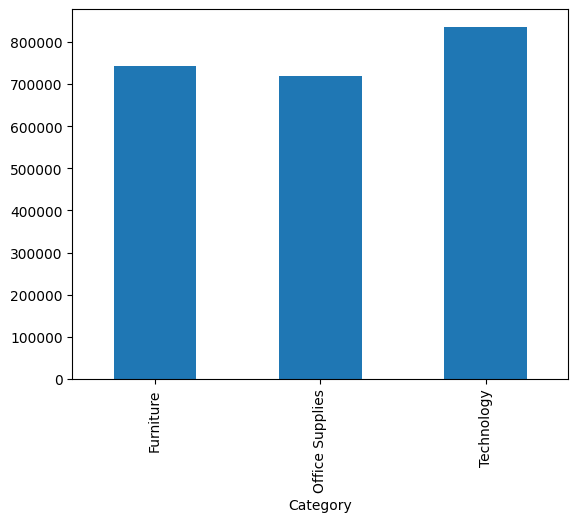

In [131]:
print(df.groupby('Category')['Sales'].sum())
df.groupby('Category')['Sales'].sum().plot.bar()

In [132]:
df.groupby("Category")["Sales"].mean()

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

In [133]:
df.groupby('Category')['Profit'].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [134]:
df.groupby("Category")["Profit"].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

<Axes: xlabel='Category'>

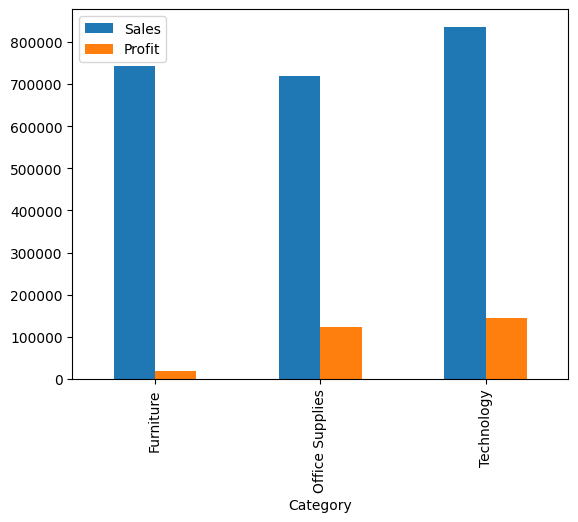

In [135]:
df.groupby('Category')['Sales', 'Profit'].sum().plot.bar()

<Axes: ylabel='Sales'>

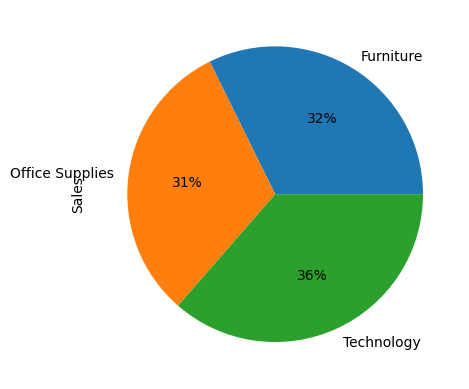

In [136]:
df.groupby('Category')['Sales'].sum().plot.pie(autopct = "%1.0f%%")

<Axes: ylabel='Profit'>

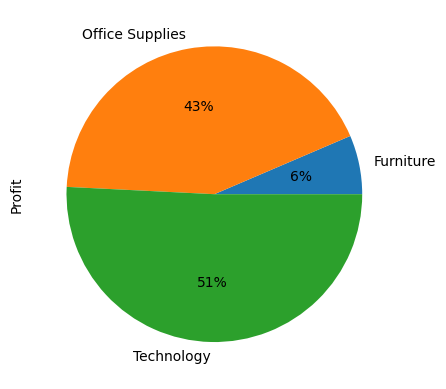

In [137]:
df.groupby('Category')['Profit'].sum().plot.pie(autopct = "%1.0f%%")

Sub-Category Analysis

In [138]:
df.groupby('Sub-Category')['Sales', "Profit"].sum()

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [139]:
df.groupby("Sub-Category")["Sales", "Profit"].mean()

,Sales,Profit
Sub-Category,,
Accessories,215.974604,54.111788
Appliances,230.755710,38.922758
Art,34.068834,8.200737
Binders,133.560560,19.843574
Bookcases,503.859633,-15.230509
Chairs,532.332420,43.095894
Copiers,2198.941618,817.909190
Envelopes,64.867724,27.418019
Fasteners,13.936774,4.375660


<Axes: xlabel='Sub-Category'>

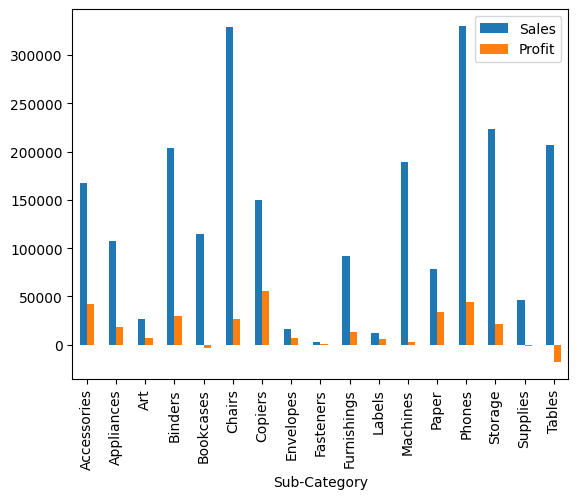

In [140]:
df.groupby('Sub-Category')['Sales', "Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

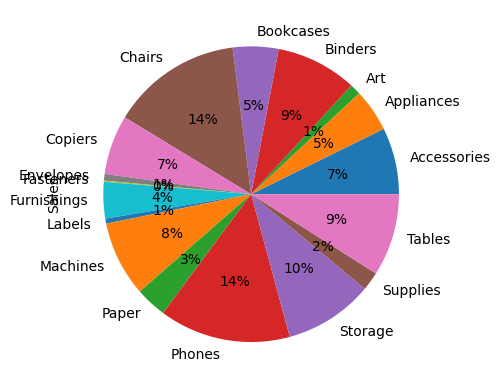

In [141]:
df.groupby('Sub-Category')['Sales'].sum().plot.pie(autopct = "%1.0f%%")

Segment Analysis

In [142]:
df.groupby('Segment')['Sales', 'Profit'].sum()

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [143]:
df.groupby("Segment")["Sales", "Profit"].mean()

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


<Axes: xlabel='Segment'>

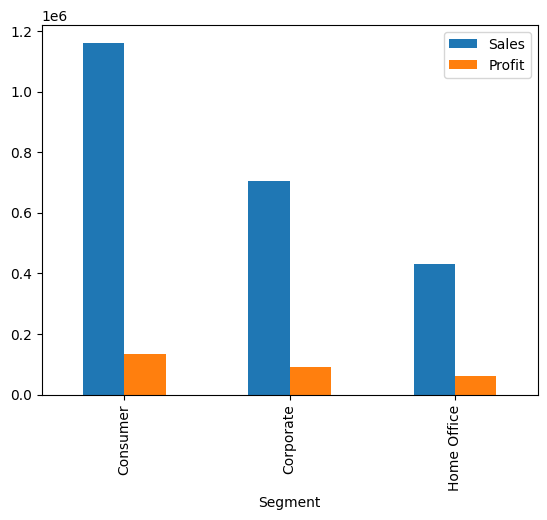

In [144]:
df.groupby('Segment')['Sales', 'Profit'].sum().plot.bar()

<Axes: ylabel='Sales'>

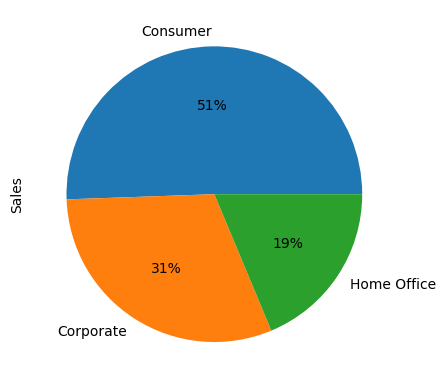

In [145]:
df.groupby('Segment')['Sales'].sum().plot.pie(autopct = "%1.0f%%")

<Axes: ylabel='Profit'>

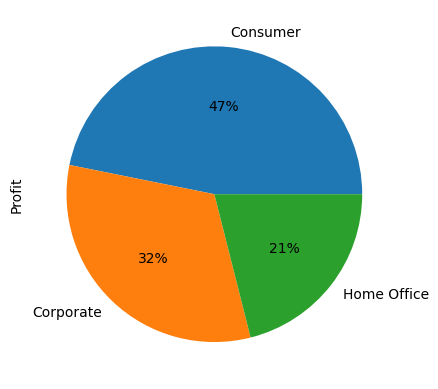

In [146]:
df.groupby('Segment')['Profit'].sum().plot.pie(autopct = "%1.0f%%")

Region Analysis

In [147]:
df.groupby('Region')['Sales', 'Profit'].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


In [148]:
df.groupby('Region')['Sales', 'Profit'].mean()

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


<Axes: xlabel='Region'>

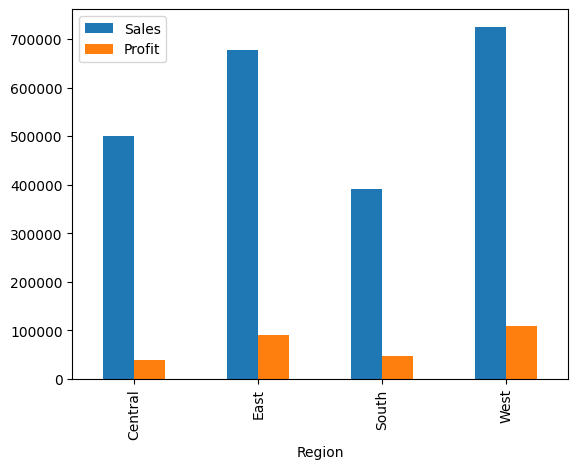

In [149]:
df.groupby('Region')['Sales', 'Profit'].sum().plot.bar()

<Axes: ylabel='Sales'>

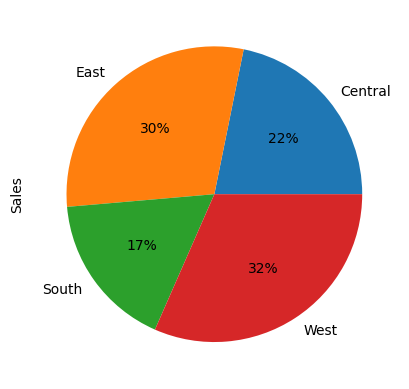

In [150]:
df.groupby('Region')['Sales'].sum().plot.pie(autopct = "%1.0f%%")

<Axes: ylabel='Profit'>

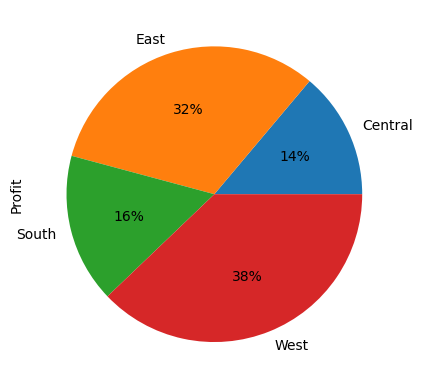

In [151]:
df.groupby('Region')['Profit'].sum().plot.pie(autopct = "%1.0f%%")

City Analysis

In [152]:
top_10_sales_city = df.groupby('City')['Sales'].agg('sum').reset_index().sort_values('Sales', ascending=False).head(10)
top_10_sales_city

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


In [153]:
top_10_sales_city.set_index("City", inplace = True)
top_10_sales_city

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


Text(0.5, 1.0, 'Top 10 City in Sales')

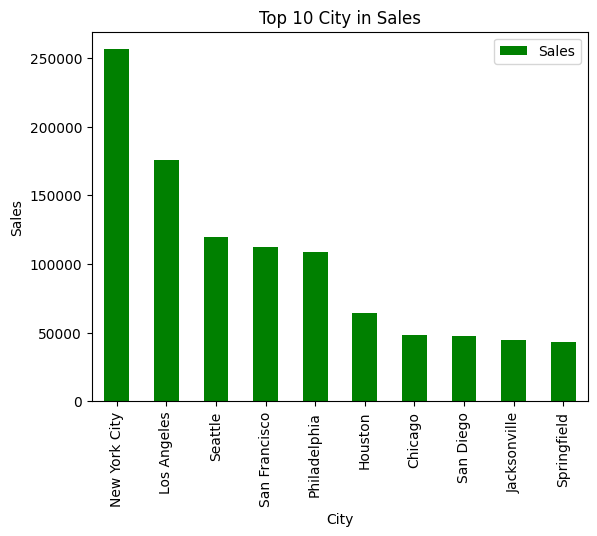

In [154]:
top_10_sales_city.plot.bar(color='g')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 10 City in Sales")

In [155]:
top_10_profit_city = df.groupby("City")["Profit"].agg("sum").reset_index().sort_values("Profit", ascending= False).head(10)
top_10_profit_city

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [156]:
top_10_profit_city.set_index("City", inplace=True)
top_10_profit_city

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


Text(0.5, 1.0, 'Top 10 Cities in Profit')

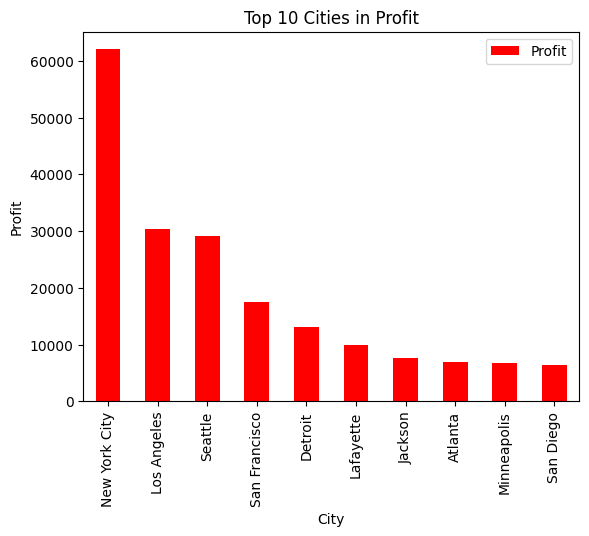

In [157]:
top_10_profit_city.plot.bar(color='r')
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Top 10 Cities in Profit")

In [158]:
comp = df.groupby("City")["Sales", "Profit"].agg('sum').reset_index().sort_values("Sales", ascending=False).head(10)
comp.set_index("City", inplace = True)
comp

,Sales,Profit
City,,
New York City,256368.1610,62036.9837
Los Angeles,175851.3410,30440.7579
Seattle,119540.7420,29156.0967
San Francisco,112669.0920,17507.3854
Philadelphia,109077.0130,-13837.7674
Houston,64504.7604,-10153.5485
Chicago,48539.5410,-6654.5688
San Diego,47521.0290,6377.1960
Jacksonville,44713.1830,-2323.8350


Text(0.5, 1.0, 'Sales vs Profit in Top 10 Cities in Sales')

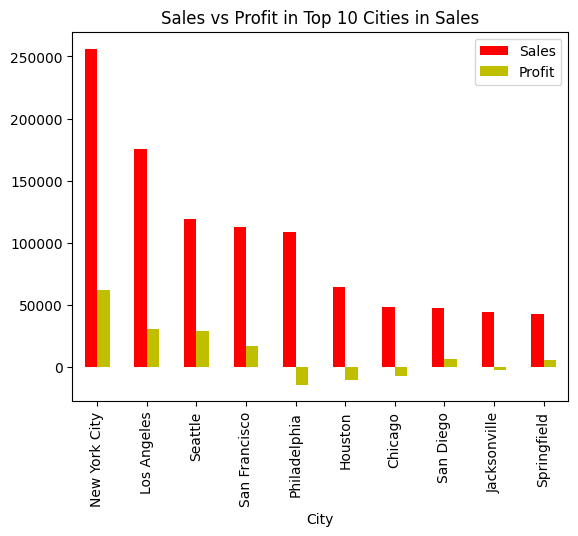

In [159]:
comp.plot.bar(color = ['r', 'y'])
plt.xlabel("City")
plt.title("Sales vs Profit in Top 10 Cities in Sales")

State Analysis

In [160]:
top_10_states_sales = df.groupby("State")["Sales"].agg("sum").reset_index().sort_values("Sales", ascending=False).head(10)
top_10_states_sales.set_index("State", inplace=True)
top_10_states_sales

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


Text(0.5, 1.0, 'Top 10 States in Sales')

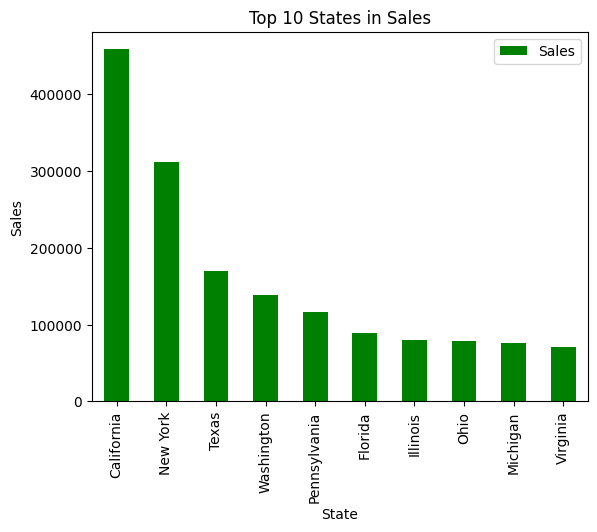

In [161]:
top_10_states_sales.plot.bar(color='g')
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Top 10 States in Sales")

In [162]:
top_10_state_profit = df.groupby("State")["Profit"].agg('sum').reset_index().sort_values("Profit", ascending=False).head(10)
top_10_state_profit.set_index("State", inplace=True)
top_10_state_profit

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


Text(0.5, 1.0, 'Top 10 States in Profit')

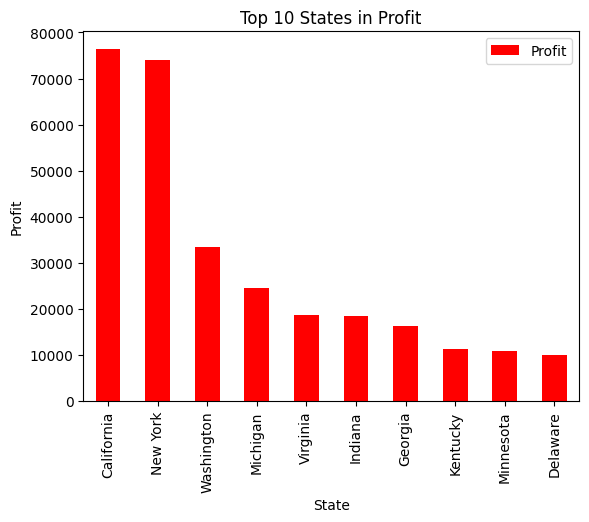

In [163]:
top_10_state_profit.plot.bar(color='r')
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Top 10 States in Profit")

In [164]:
comp1 = df.groupby("State")["Sales", "Profit"].agg('sum').reset_index().sort_values("Sales", ascending = False).head(10)
comp1.set_index("State", inplace= True)
comp1

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Texas,170188.0458,-25729.3563
Washington,138641.2700,33402.6517
Pennsylvania,116511.9140,-15559.9603
Florida,89473.7080,-3399.3017
Illinois,80166.1010,-12607.8870
Ohio,78258.1360,-16971.3766
Michigan,76269.6140,24463.1876


Text(0.5, 1.0, 'Sales vs Profit in Top 10 States in Sales')

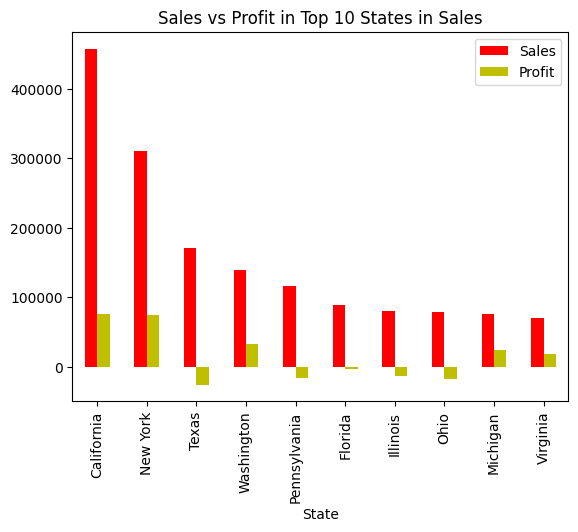

In [165]:
comp1.plot.bar(color = ['r', 'y'])
plt.xlabel("State")
plt.title("Sales vs Profit in Top 10 States in Sales")

Revenue Analysis

In [166]:
df["Revenue"] = df["Sales"]*df["Quantity"] - df["Quantity"]*df["Discount"]

In [167]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4785.6375
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.3360


<Axes: xlabel='Segment'>

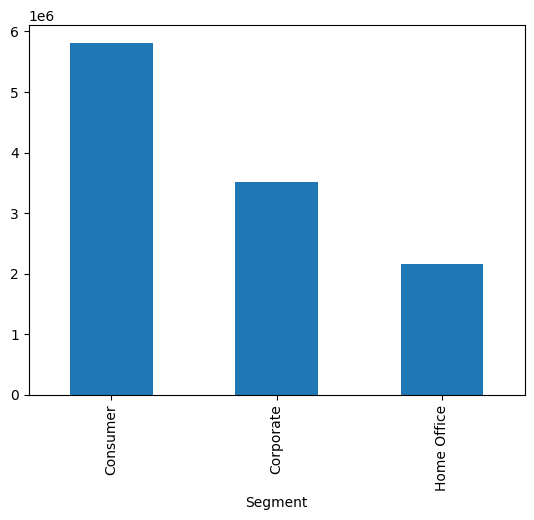

In [168]:
df.groupby("Segment")["Revenue"].sum().plot.bar()

<Axes: xlabel='Category'>

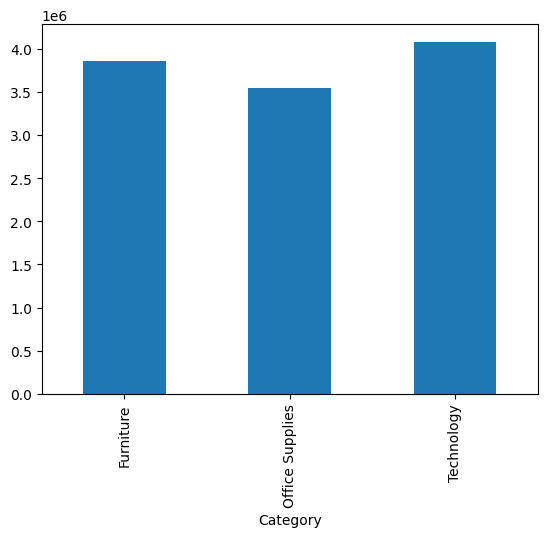

In [169]:
df.groupby("Category")["Revenue"].sum().plot.bar()

<Axes: xlabel='Sub-Category'>

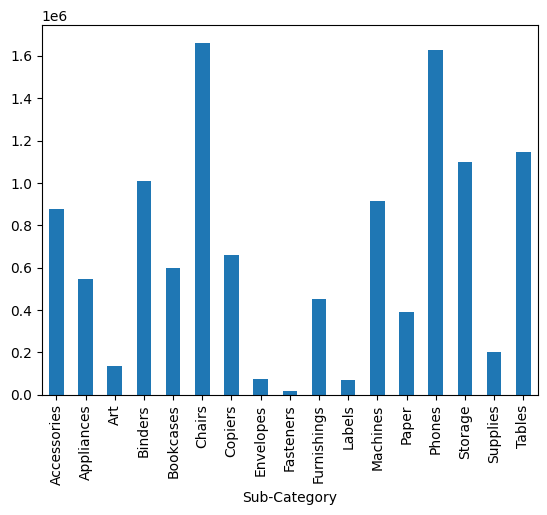

In [170]:
df.groupby("Sub-Category")["Revenue"].sum().plot.bar()

<Axes: xlabel='Region'>

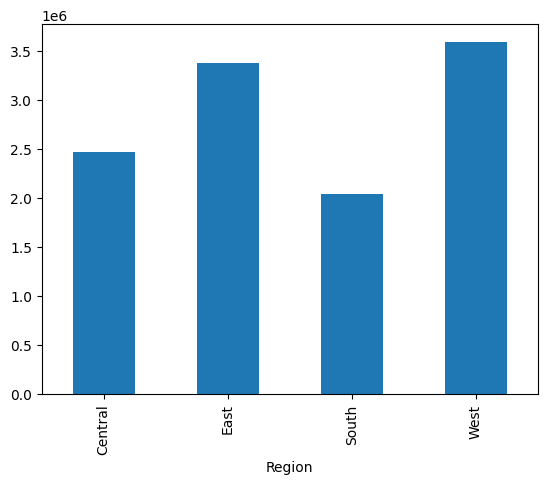

In [171]:
df.groupby("Region")["Revenue"].sum().plot.bar()

In [172]:
top_10_city_revenue = df.groupby("City")["Revenue"].agg('sum').reset_index().sort_values("Revenue", ascending= False).head(10)
top_10_city_revenue.set_index("City", inplace= True)
top_10_city_revenue

,Revenue
City,
New York City,1.263285e+06
Los Angeles,8.730006e+05
Seattle,5.975058e+05
Philadelphia,5.671387e+05
San Francisco,5.412927e+05
Houston,3.055093e+05
Detroit,2.704124e+05
San Diego,2.605191e+05
Jacksonville,2.416388e+05


Text(0.5, 1.0, 'Top 10 Cities in Revenue')

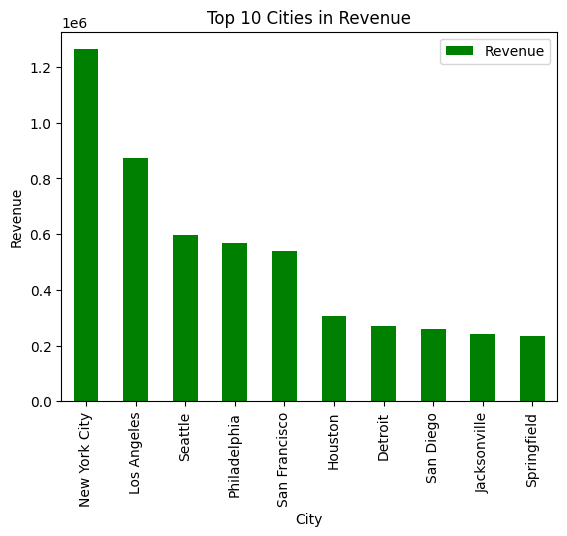

In [173]:
top_10_city_revenue.plot.bar(color='g')
plt.xlabel("City")
plt.ylabel("Revenue")
plt.title("Top 10 Cities in Revenue")

In [174]:
top_10_state_revenue = df.groupby("State")["Revenue"].agg('sum').reset_index().sort_values("Revenue", ascending= False).head(10)
top_10_state_revenue.set_index("State", inplace= True)
top_10_state_revenue

,Revenue
State,
California,2.300660e+06
New York,1.560838e+06
Texas,8.326920e+05
Washington,6.922360e+05
Pennsylvania,6.014280e+05
Florida,4.716678e+05
Michigan,4.103449e+05
Virginia,3.764538e+05
Illinois,3.643566e+05


Text(0.5, 1.0, 'Top 10 States in Revenue')

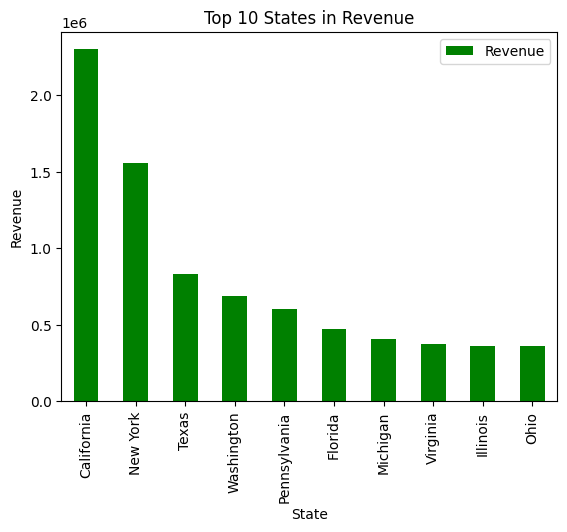

In [175]:
top_10_state_revenue.plot.bar(color='g')
plt.xlabel("State")
plt.ylabel("Revenue")
plt.title("Top 10 States in Revenue")

Products and Brand Analysis

In [176]:
top_10_product_sales = df.groupby("Product Name")["Sales"].agg('sum').reset_index().sort_values("Sales", ascending= False).head(10)
top_10_product_sales.set_index("Product Name", inplace= True)
top_10_product_sales

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


Text(0.5, 1.0, 'Top 10 Products in Sales')

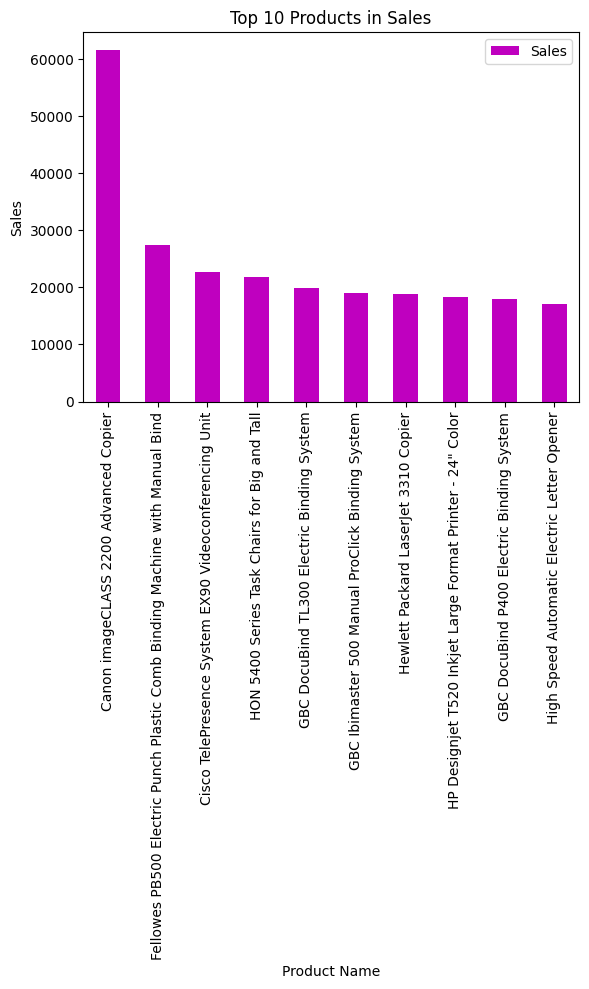

In [177]:
top_10_product_sales.plot.bar(color='m')
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.title("Top 10 Products in Sales")

In [178]:
top_10_product_profit = df.groupby("Product Name")["Profit"].agg('sum').reset_index().sort_values("Profit", ascending= False).head(10)
top_10_product_profit.set_index("Product Name", inplace= True)
top_10_product_profit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


Text(0.5, 1.0, 'Top 10 Products in Profit')

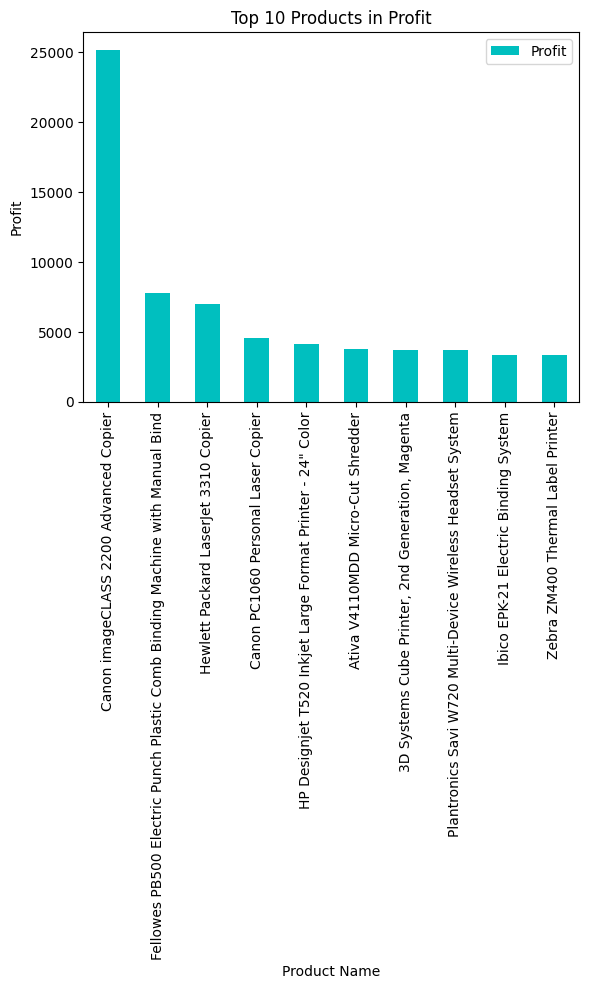

In [179]:
top_10_product_profit.plot.bar(color='c')
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.title("Top 10 Products in Profit")

In [180]:
top_10_product_revenue = df.groupby("Product Name")["Revenue"].agg('sum').reset_index().sort_values("Revenue", ascending= False).head(10)
top_10_product_revenue.set_index("Product Name", inplace= True)
top_10_product_revenue

,Revenue
Product Name,
Canon imageCLASS 2200 Advanced Copier,253396.8760
GBC Ibimaster 500 Manual ProClick Binding System,171501.8920
Cisco TelePresence System EX90 Videoconferencing Unit,135827.8800
HON 5400 Series Task Chairs for Big and Tall,124486.2480
Samsung Galaxy Mega 6.3,118095.3880
Hewlett Packard LaserJet 3310 Copier,111471.5420
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,100653.0080
Lexmark MX611dhe Monochrome Laser Printer,93321.3510
"3D Systems Cube Printer, 2nd Generation, Magenta",84499.3500


Text(0.5, 1.0, 'Top 10 Products in Revenue')

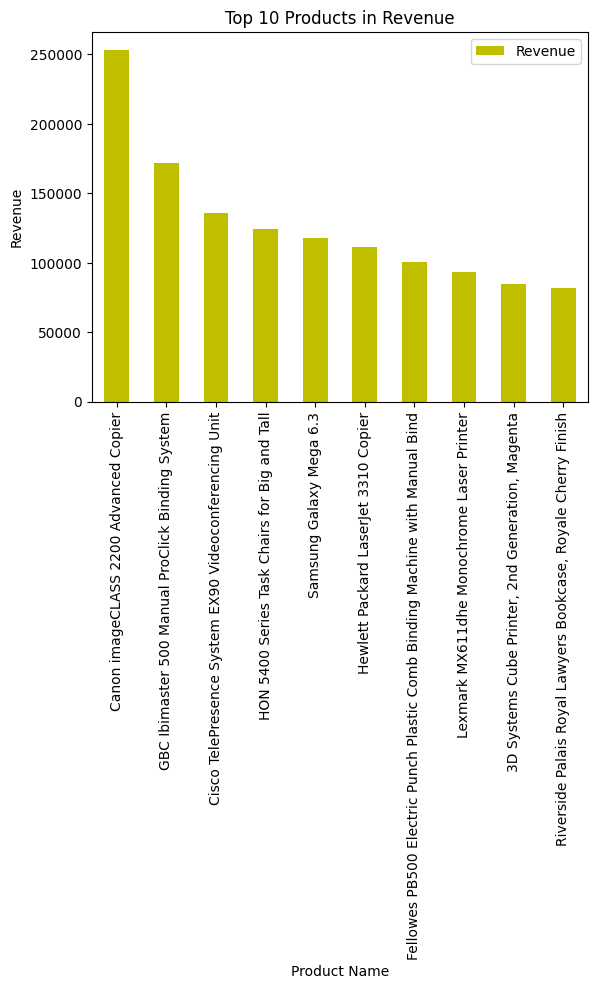

In [181]:
top_10_product_revenue.plot.bar(color='y')
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.title("Top 10 Products in Revenue")

In [182]:
l1 = []
for i in range(len(df)):
    l = df["Product Name"][i].split(' ')
    l1.append(l[0])

In [183]:
df["Brand"]  = l1

In [184]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,Brand
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200,Bush
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200,Hon
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400,Self-Adhesive
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4785.6375,Bretford
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.3360,Eldon


In [185]:
print("Number of Brands sold in the superstor: ", df["Brand"].nunique())

Number of Brands sold in the superstor:  501


In [186]:
top_10_brand_sales = df.groupby("Brand")["Sales"].agg('sum').reset_index().sort_values("Sales", ascending= False).head(10)
top_10_brand_sales.set_index("Brand", inplace= True)
top_10_brand_sales

,Sales
Brand,
Global,129889.7260
Hon,128275.4501
Canon,107504.8110
GBC,95630.4440
Fellowes,85283.9820
Xerox,57658.3220
Tennsco,52663.0960
Cisco,52518.4410
Samsung,46661.8680


Text(0.5, 1.0, 'Top 10 Brands in Sales')

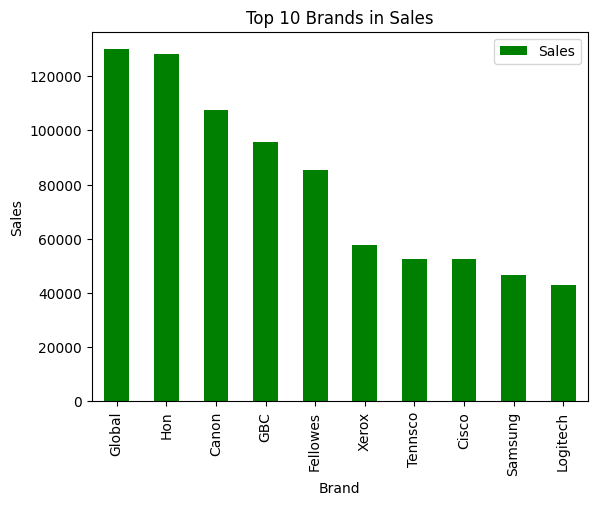

In [187]:
top_10_brand_sales.plot.bar(color='g')
plt.xlabel("Brand")
plt.ylabel("Sales")
plt.title("Top 10 Brands in Sales")

In [188]:
top_10_brand_profit = df.groupby("Brand")["Profit"].agg('sum').reset_index().sort_values("Profit", ascending= False).head(10)
top_10_brand_profit.set_index("Brand", inplace= True)
top_10_brand_profit

,Profit
Brand,
Canon,41905.5097
Xerox,23621.8096
Fellowes,15299.6686
Hewlett,10948.7931
Plantronics,10589.4366
Logitech,10080.9598
Hon,9632.1025
Global,9306.5787
Ibico,7377.1855


Text(0.5, 1.0, 'Top 10 Brands in Profit')

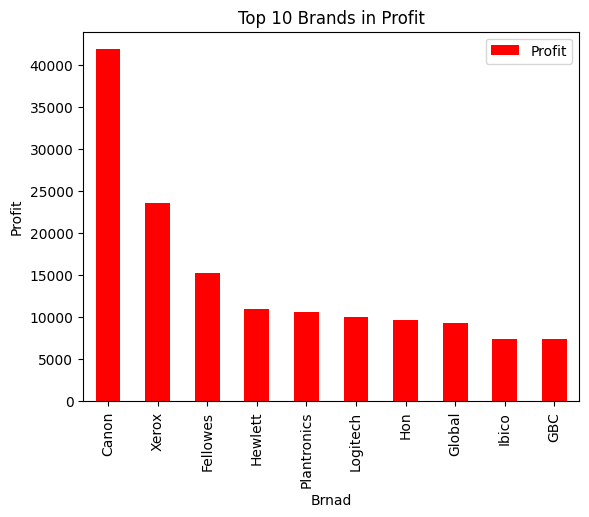

In [189]:
top_10_brand_profit.plot.bar(color='r')
plt.xlabel("Brnad")
plt.ylabel("Profit")
plt.title("Top 10 Brands in Profit")

In [190]:
top_10_brand_revenue = df.groupby("Brand")["Revenue"].agg('sum').reset_index().sort_values("Revenue", ascending= False).head(10)
top_10_brand_revenue.set_index("Brand", inplace= True)
top_10_brand_revenue

,Revenue
Brand,
Hon,703361.4139
Global,584616.3560
GBC,511010.2620
Canon,461181.2210
Fellowes,404705.8880
Cisco,301681.3350
Xerox,292443.3180
Samsung,280321.1880
Tennsco,234562.8880


Text(0.5, 1.0, 'Top 10 Brand by Revenue')

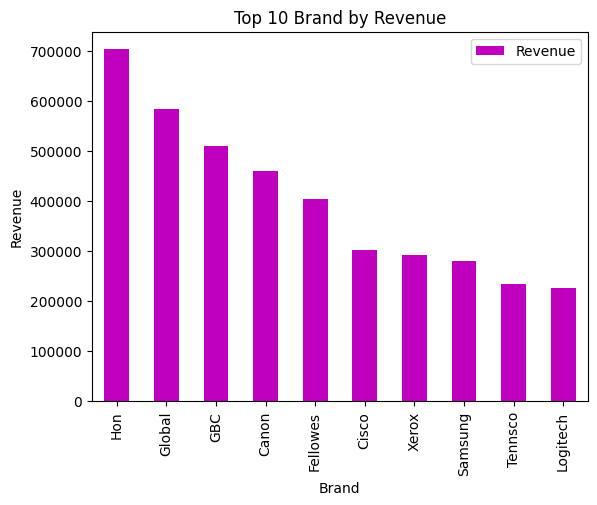

In [191]:
top_10_brand_revenue.plot.bar(color='m')
plt.xlabel("Brand")
plt.ylabel("Revenue")
plt.title("Top 10 Brand by Revenue")

In [192]:
top_10_brand_sold = df["Brand"].value_counts().reset_index().sort_values("Brand", ascending= False).head(10)
top_10_brand_sold.set_index("index", inplace= True)
top_10_brand_sold

,Brand
index,
Xerox,865
Avery,553
GBC,332
Global,284
Newell,276
Eldon,245
Fellowes,230
Acco,214
Wilson,186


Text(0.5, 1.0, 'Top 10 Brands sold')

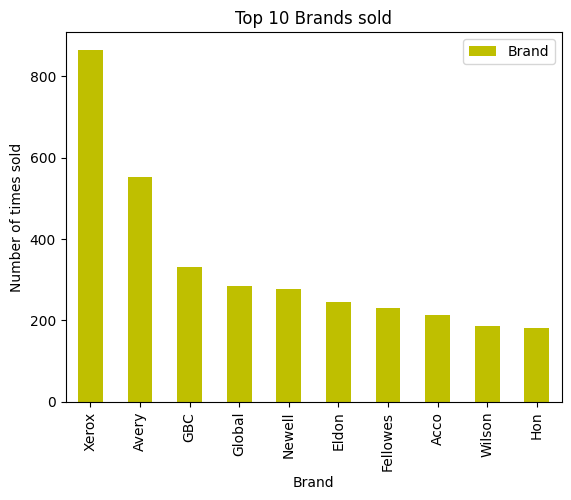

In [193]:
top_10_brand_sold.plot.bar(color='y')
plt.xlabel("Brand")
plt.ylabel("Number of times sold")
plt.title("Top 10 Brands sold")

Numerical Column Analysis

In [194]:
# Extracting Numerical Columns
num = []
for i in df.columns:
    if df[i].dtypes != "O":
        num.append(i)

print(num)

['Order Date', 'Ship Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'Revenue']


In [195]:
num_df = df[num]

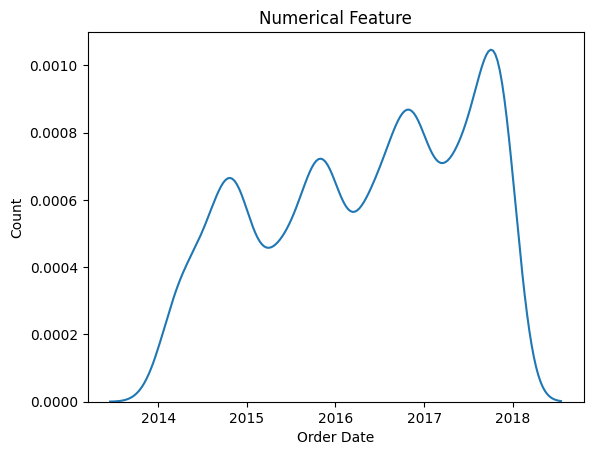

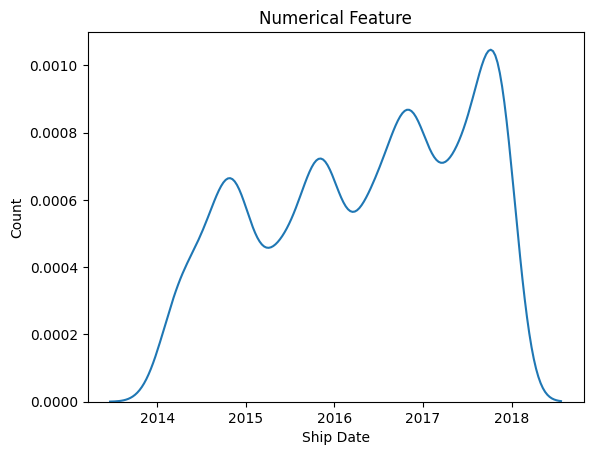

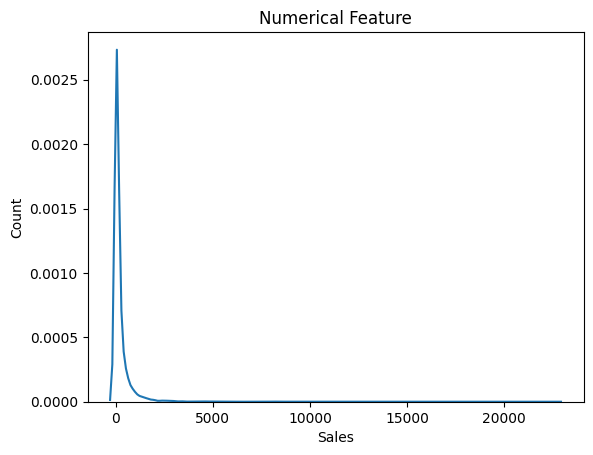

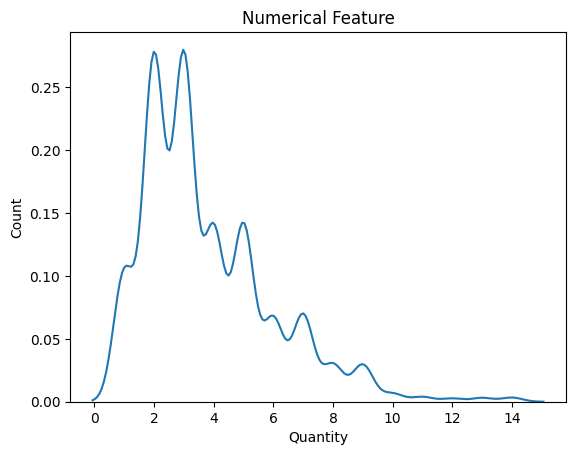

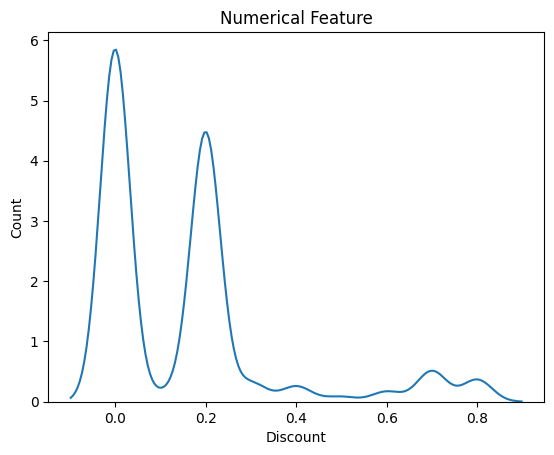

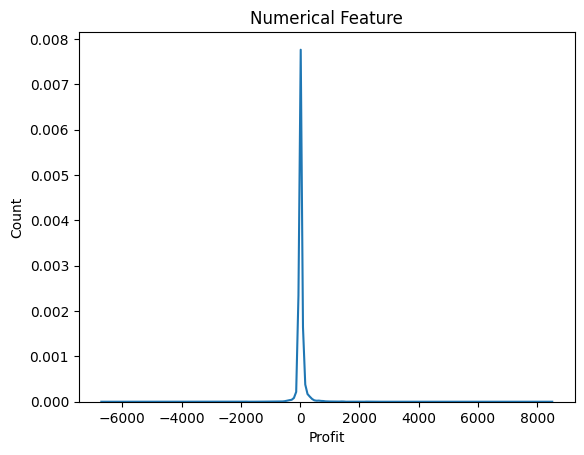

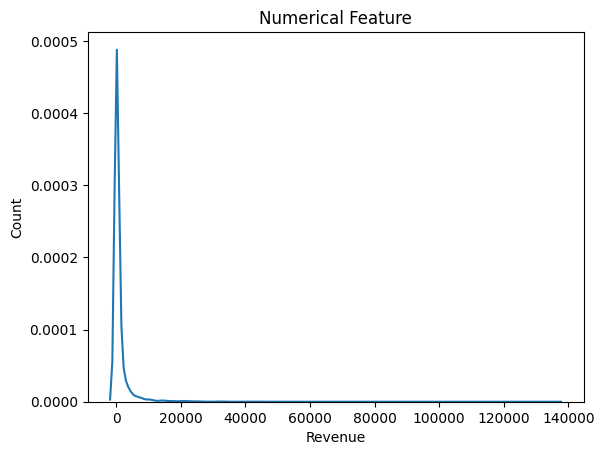

In [196]:
for i in num_df.columns:
    sns.kdeplot(num_df[i])
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title("Numerical Feature")
    plt.show()

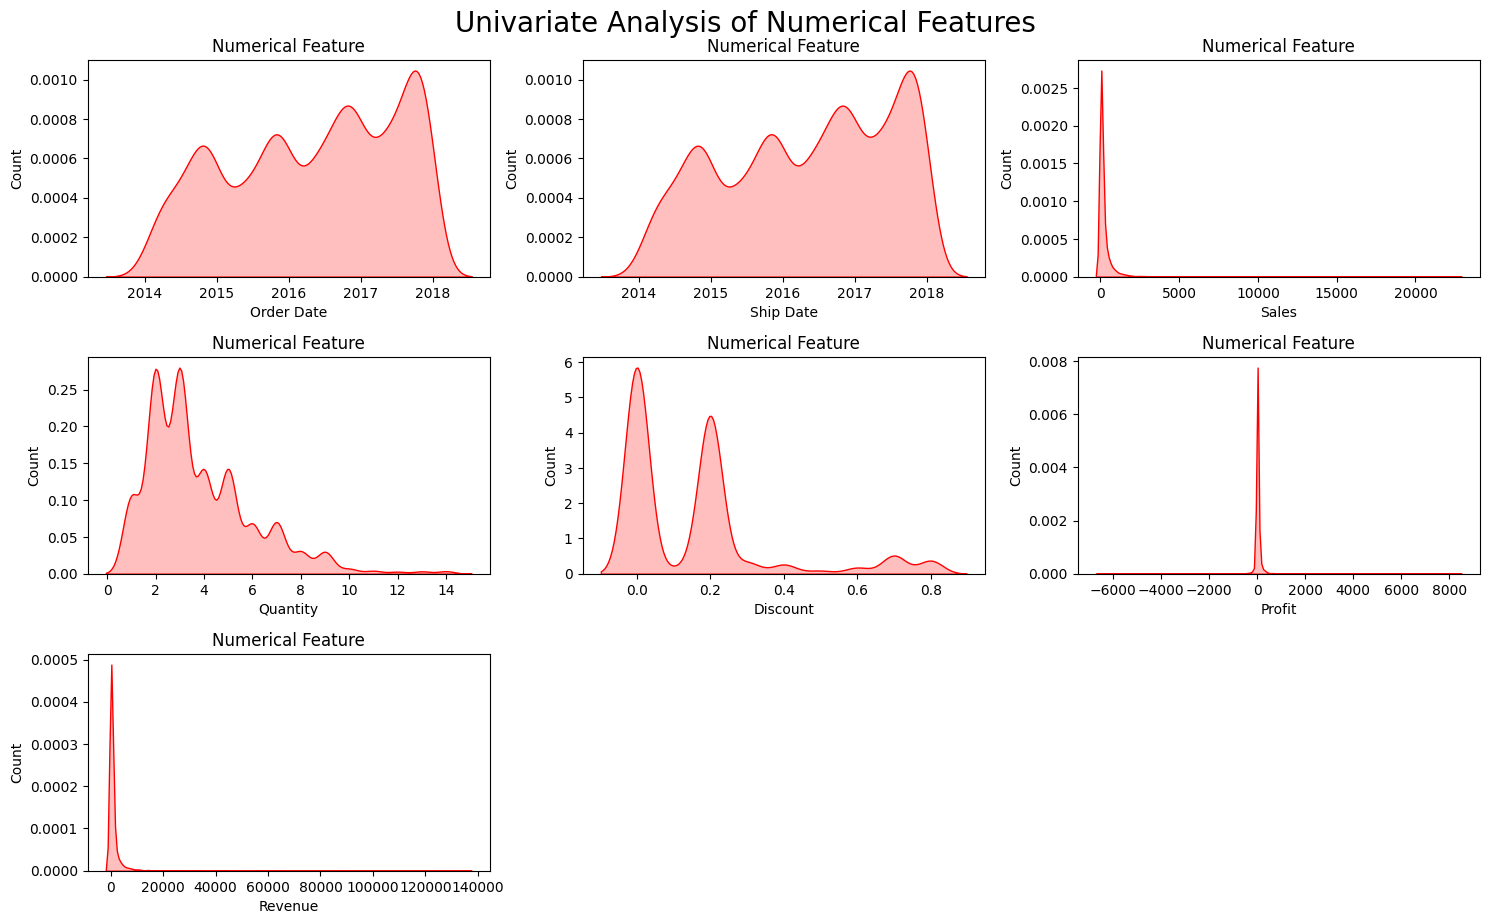

In [197]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize = 20)

for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df[num[i]], shade = True, color='r')
    plt.xlabel(num[i])
    plt.ylabel("Count")
    plt.title("Numerical Feature")
    plt.tight_layout()

Yealy Analysis

In [198]:
df["Year"] = df["Order Date"].dt.year

In [199]:
df["Year"]

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Year, Length: 9994, dtype: int64

In [200]:
df.groupby("Year")["Sales"].agg("sum").reset_index()

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [201]:
df.groupby("Year")["Sales"].mean()

Year
2014    242.974159
2015    223.849909
2016    235.487282
2017    221.381418
Name: Sales, dtype: float64

In [202]:
df.groupby("Year")["Profit"].sum()

Year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64

In [203]:
df.groupby("Year")["Profit"].mean()

Year
2014    24.858994
2015    29.314274
2016    31.617771
2017    28.212340
Name: Profit, dtype: float64

In [204]:
df.groupby("Year")["Revenue"].sum()

Year
2014    2.467089e+06
2015    2.383645e+06
2016    3.048534e+06
2017    3.582838e+06
Name: Revenue, dtype: float64

In [205]:
df.groupby("Year")["Revenue"].mean()

Year
2014    1237.876992
2015    1133.989262
2016    1178.405143
2017    1081.774831
Name: Revenue, dtype: float64

<Axes: xlabel='Year'>

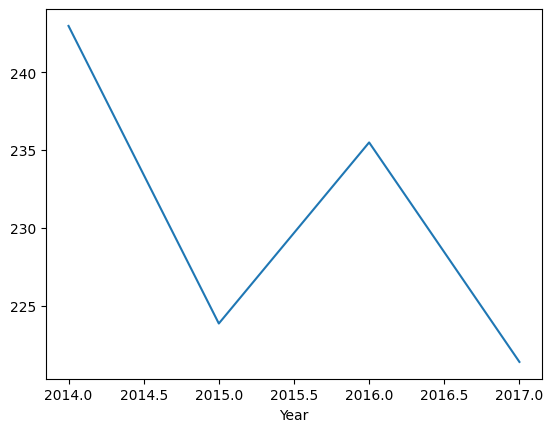

In [206]:
df.groupby("Year")["Sales"].mean().plot.line()

In [207]:
year_grp = df.groupby(["Year", "Brand"])["Sales"].agg("sum").reset_index()
for i in year_grp["Year"].unique():
    x = year_grp[year_grp["Year"]==i].reset_index()
    y = year_grp[year_grp["Sales"]==max(x["Sales"])].reset_index()
    print(y)

   index  Year Brand       Sales
0    161  2014   Hon  28871.2316
   index  Year     Brand      Sales
0    514  2015  Fellowes  28203.807
   index  Year Brand      Sales
0    948  2016   Hon  39300.952
   index  Year  Brand      Sales
0   1271  2017  Canon  48939.658


Monthly Analysis

In [208]:
df["Month"] = df["Order Date"].dt.month

In [209]:
df.groupby("Month")["Sales"].sum()

Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

<Axes: xlabel='Month'>

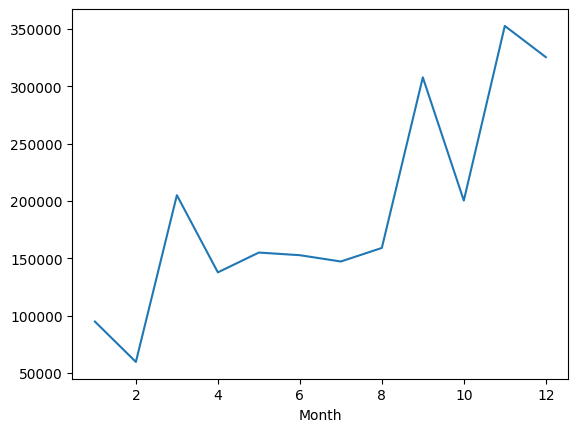

In [210]:
df.groupby("Month")["Sales"].sum().plot.line()

In [211]:
df.groupby("Month")["Sales"].mean()

Month
1     249.146550
2     199.170838
3     294.548116
4     206.230731
5     210.923553
6     212.996763
7     207.377601
8     225.274877
9     222.451154
10    244.594609
11    239.606438
12    231.032318
Name: Sales, dtype: float64

In [212]:
df.groupby("Month")["Profit"].sum()

Month
1      9134.4461
2     10294.6107
3     28594.6872
4     11587.4363
5     22411.3078
6     21285.7954
7     13832.6648
8     21776.9384
9     36857.4753
10    31784.0413
11    35468.4265
12    43369.1919
Name: Profit, dtype: float64

<Axes: xlabel='Month'>

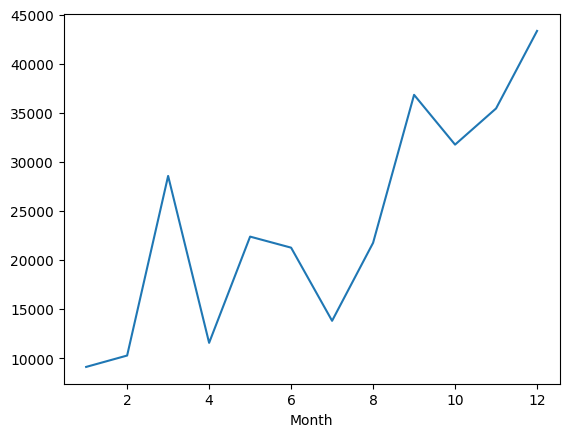

In [213]:
df.groupby("Month")["Profit"].sum().plot.line()

In [214]:
df.groupby("Month")["Profit"].mean()

Month
1     23.974924
2     34.315369
3     41.084321
4     17.346462
5     30.491575
6     29.687302
7     19.482626
8     30.845522
9     26.650380
10    38.808353
11    24.111779
12    30.801983
Name: Profit, dtype: float64

In [215]:
df.groupby("Month")["Revenue"].sum()

Month
1     5.049652e+05
2     2.644982e+05
3     9.804369e+05
4     6.271742e+05
5     7.974180e+05
6     7.204379e+05
7     7.017927e+05
8     8.776831e+05
9     1.515047e+06
10    9.970015e+05
11    1.749049e+06
12    1.746603e+06
Name: Revenue, dtype: float64

<Axes: xlabel='Month'>

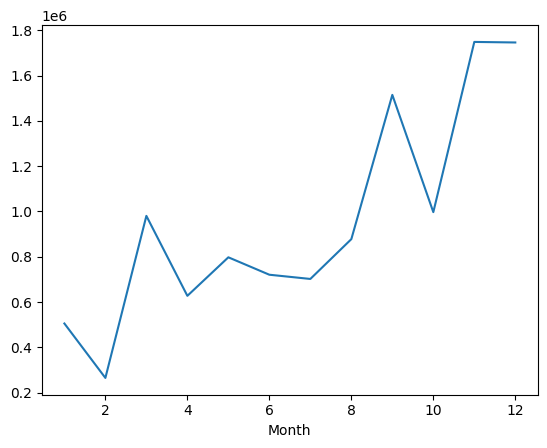

In [216]:
df.groupby("Month")["Revenue"].sum().plot.line()

In [217]:
df.groupby("Month")["Revenue"].mean()

Month
1     1325.367907
2      881.660775
3     1408.673753
4      938.883590
5     1084.922461
6     1004.794840
7      988.440396
8     1243.177233
9     1095.478768
10    1217.340082
11    1189.020069
12    1240.485188
Name: Revenue, dtype: float64

In [218]:
month_grp = df.groupby(["Month", "Brand"])["Sales"].agg("sum").reset_index()
for i in month_grp["Month"].unique():
    x = month_grp[month_grp["Month"]==i].reset_index()
    y = month_grp[month_grp["Sales"]==max(x["Sales"])].reset_index()
    print(y)

   index  Month Brand    Sales
0     63      1   GBC  8561.85
   index  Month Brand     Sales
0    213      2    HP  9013.054
   index  Month  Brand      Sales
0    350      3  Cisco  24513.946
   index  Month Brand    Sales
0    550      4    3D  9099.93
   index  Month  Brand      Sales
0    823      5  Canon  12599.916
   index  Month Brand       Sales
0   1112      6   Hon  12000.1746
   index  Month Brand      Sales
0   1350      7   Hon  11274.203
   index  Month Brand      Sales
0   1561      8   GBC  12135.338
   index  Month   Brand      Sales
0   1832      9  Global  20616.098
   index  Month  Brand      Sales
0   2104     10  Canon  29179.894
   index  Month Brand       Sales
0   2464     11   Hon  24323.6075
   index  Month Brand      Sales
0   2803     12   Hon  19282.226


Ship Mode Analysis

<Axes: xlabel='Ship Mode'>

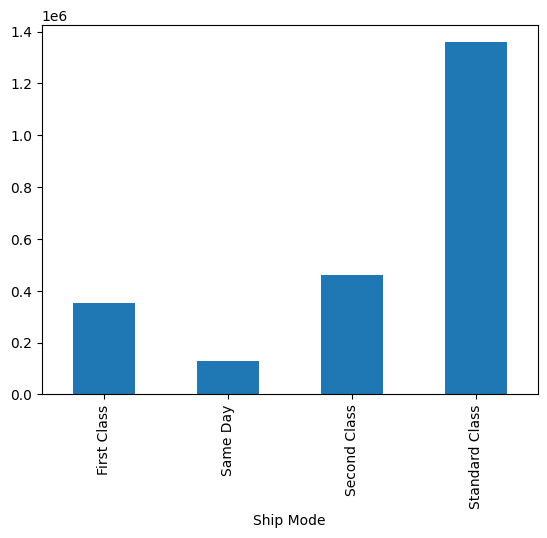

In [219]:
df.groupby("Ship Mode")["Sales"].sum().plot.bar()

<Axes: xlabel='Ship Mode'>

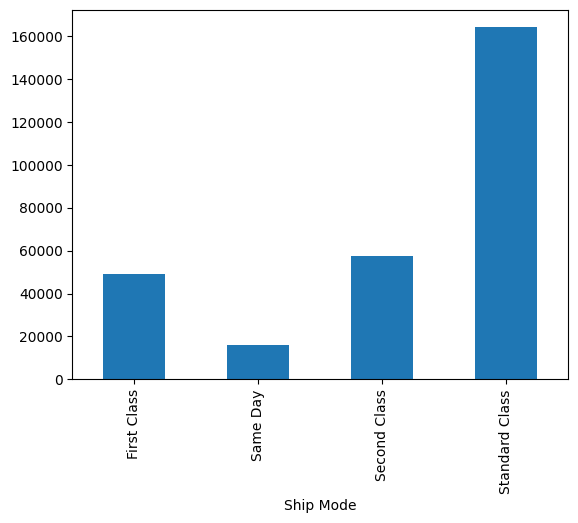

In [220]:
df.groupby("Ship Mode")["Profit"].sum().plot.bar()

<Axes: xlabel='Ship Mode'>

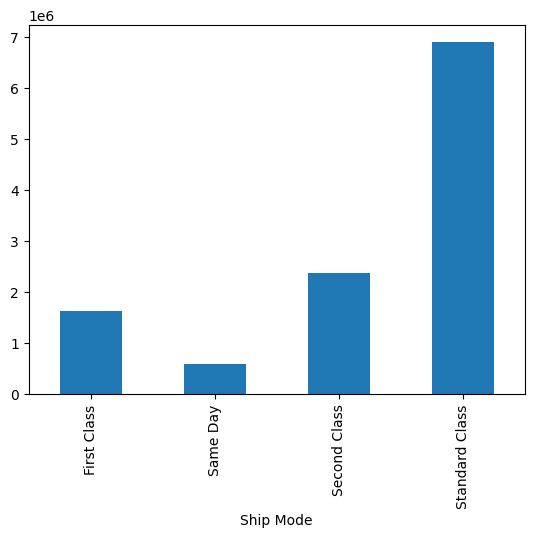

In [221]:
df.groupby("Ship Mode")["Revenue"].sum().plot.bar()

Quantity

In [222]:
top_10_bought_products = df.groupby("Product Name")["Quantity"].agg("sum").reset_index().sort_values("Quantity", ascending = False).head(10)
top_10_bought_products.set_index("Product Name", inplace = True)
top_10_bought_products

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


In [223]:
top_10_bought_brand = df.groupby("Brand")["Quantity"].agg("sum").reset_index().sort_values("Quantity", ascending = False).head(10)
top_10_bought_brand.set_index("Brand", inplace = True)
top_10_bought_brand

,Quantity
Brand,
Xerox,3249
Avery,2115
GBC,1309
Global,1032
Newell,1031
Eldon,946
Fellowes,912
Acco,804
Hon,750


Discount

In [224]:
top_10_discount_products = df.groupby("Product Name")["Discount"].agg("sum").reset_index().sort_values("Discount", ascending = False).head(10)
top_10_discount_products.set_index("Product Name", inplace = True)
top_10_discount_products

,Discount
Product Name,
Storex Dura Pro Binders,7.2
Avery Non-Stick Binders,6.8
GBC Instant Report Kit,6.4
Avery Self-Adhesive Photo Pockets for Polaroid Photos,5.9
"GBC Standard Recycled Report Covers, Clear Plastic Sheets",5.9
"Premier Elliptical Ring Binder, Black",5.8
GBC Standard Therm-A-Bind Covers,5.8
Acco D-Ring Binder w/DublLock,5.6
GBC Premium Transparent Covers with Diagonal Lined Pattern,5.6


In [225]:
top_10_discount_brand = df.groupby("Brand")["Discount"].agg('sum').reset_index().sort_values("Discount", ascending=False).head(10)
top_10_discount_brand.set_index("Brand", inplace = True)
top_10_discount_brand

,Discount
Brand,
GBC,129.60
Avery,113.30
Xerox,66.60
Wilson,64.30
Acco,61.10
Global,50.40
Fellowes,33.50
Hon,32.67
Eldon,29.40


In [229]:
# Different in Order Date and Ship Date
df["Delay in Shipping"] = df["Ship Date"] - df["Order Date"]

In [230]:
df["Delay in Shipping"]

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9989   2 days
9990   5 days
9991   5 days
9992   5 days
9993   5 days
Name: Delay in Shipping, Length: 9994, dtype: timedelta64[ns]

In [233]:
#Average Delay in Each City
top_10_most_delay_shipping_City = df.groupby("City")["Delay in Shipping"].mean().reset_index().sort_values("Delay in Shipping", ascending =False).head(10)
top_10_most_delay_shipping_City.set_index("City", inplace= True)
top_10_most_delay_shipping_City

,Delay in Shipping
City,
Danbury,7 days 00:00:00
Yucaipa,7 days 00:00:00
Norfolk,7 days 00:00:00
Conway,7 days 00:00:00
Oswego,7 days 00:00:00
Waukesha,7 days 00:00:00
Citrus Heights,7 days 00:00:00
Olathe,6 days 14:24:00
Hot Springs,6 days 12:00:00


In [234]:
top_10_least_delay_shipping_City = df.groupby("City")["Delay in Shipping"].mean().reset_index().sort_values("Delay in Shipping", ascending =True).head(10)
top_10_least_delay_shipping_City.set_index("City", inplace= True)
top_10_least_delay_shipping_City

,Delay in Shipping
City,
Billings,0 days 00:00:00
Portage,0 days 00:00:00
Rock Hill,0 days 00:00:00
Kenner,0 days 00:00:00
Mentor,0 days 00:00:00
The Colony,0 days 16:00:00
Lansing,0 days 18:00:00
Redlands,0 days 21:00:00
Tinley Park,1 days 00:00:00


In [235]:
# Average Delay in States
top_10_most_delay_shipping_State = df.groupby("State")["Delay in Shipping"].mean().reset_index().sort_values("Delay in Shipping", ascending =False).head(10)
top_10_most_delay_shipping_State.set_index("State", inplace= True)
top_10_most_delay_shipping_State

,Delay in Shipping
State,
District of Columbia,5 days 16:48:00
Wyoming,5 days 00:00:00
Maine,5 days 00:00:00
Montana,4 days 14:24:00
New Mexico,4 days 12:19:27.567567567
Oklahoma,4 days 11:38:10.909090909
Minnesota,4 days 11:35:43.820224719
New Jersey,4 days 10:09:13.846153846
South Dakota,4 days 10:00:00


In [236]:
top_10_least_delay_shipping_state = df.groupby("State")["Delay in Shipping"].mean().reset_index().sort_values("Delay in Shipping", ascending =True).head(10)
top_10_least_delay_shipping_state.set_index("State", inplace= True)
top_10_least_delay_shipping_state

,Delay in Shipping
State,
North Dakota,2 days 20:34:17.142857142
West Virginia,3 days 00:00:00
Louisiana,3 days 01:08:34.285714285
Rhode Island,3 days 06:00:00
Ohio,3 days 10:53:59.232409381
Nebraska,3 days 12:00:00
South Carolina,3 days 14:17:08.571428571
Connecticut,3 days 14:20:29.268292682
Idaho,3 days 16:00:00


Customer Analysis

In [246]:
top_10_loyal_customers = df["Customer Name"].value_counts().reset_index().sort_values("Customer Name", ascending = False).head(10)
top_10_loyal_customers

,index,Customer Name
0,William Brown,37
2,Matt Abelman,34
3,Paul Prost,34
1,John Lee,34
4,Chloris Kastensmidt,32
5,Seth Vernon,32
6,Jonathan Doherty,32
7,Edward Hooks,32
8,Zuschuss Carroll,31
9,Emily Phan,31


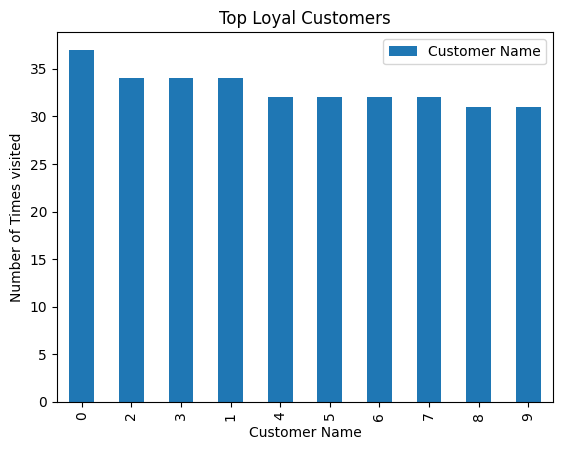

In [249]:
top_10_loyal_customers.plot.bar()
plt.title("Top Loyal Customers")
plt.xlabel("Customer Name")
plt.ylabel("Number of Times visited")
plt.show()

In [247]:
top_10_customer_Sales = df.groupby("Customer Name")["Sales"].agg("sum").reset_index().sort_values("Sales", ascending= False).head(10)
top_10_customer_Sales.set_index("Customer Name", inplace= True)
top_10_customer_Sales

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


In [248]:
top_10_customer_profit = df.groupby("Customer Name")["Profit"].agg("sum").reset_index().sort_values("Profit", ascending= False).head(10)
top_10_customer_profit.set_index("Customer Name", inplace=True)
top_10_customer_profit

,Profit
Customer Name,
Tamara Chand,8981.3239
Raymond Buch,6976.0959
Sanjit Chand,5757.4119
Hunter Lopez,5622.4292
Adrian Barton,5444.8055
Tom Ashbrook,4703.7883
Christopher Martinez,3899.8904
Keith Dawkins,3038.6254
Andy Reiter,2884.6208
